In [1]:
import pandas as pd
import numpy as np

#from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib
import pickle

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn import decomposition
from sklearn import manifold

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report


from sklearn.metrics import roc_curve, auc

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

matplotlib.style.use('ggplot') # Look Pretty

In [2]:
# load the pickled model
#modelfile='C:/Users/smith/Documents/Becky/HawkWatch/data-bc/hwi_classifier_model.pkl'
#modelfile='C:/Users/smith/Documents/Becky/HawkWatch/data-dm/hwi_classifier_model.pkl'
modelfile='C:/Users/smith/Documents/Becky/HawkWatch/data/hwi_classifier_model.pkl'

print("Load pickled model from file: ", modelfile)  
model_pkl = open(modelfile, 'rb')
clf = pickle.load(model_pkl)
# Close the pickle instances
model_pkl.close()


Load pickled model from file:  C:/Users/smith/Documents/Becky/HawkWatch/data/hwi_classifier_model.pkl


In [3]:
#File,Dir,Datetime,Camera,SeqNum,SeqLen,SeqNumDiff,Night,Mean,Std,TopCrop,BottomCrop,Carcass X,Carcass Y,Carcass Dist,
#Carcass Size,Obscuring Plants,NumObj,DistRank,Size,X,Y,Dist,Angle,Label

#filename='C:/Users/smith/Documents/Becky/HawkWatch/data-bc/tmp_labeled_data.csv'
#filename='C:/Users/smith/Documents/Becky/HawkWatch/data-dm/tmp_labeled_data.csv'
filename='C:/Users/smith/Documents/Becky/HawkWatch/data/tmp_labeled_data.csv'

df_data = pd.read_csv(filename, sep=',', header=0)
df_seq = df_data.drop(columns=['File', 'Dir', 'Datetime', 'Camera', 'SeqNum', 'SeqLen', 'SeqNumDiff', 'Night', 'Mean', 'Std', 'TopCrop', 'BottomCrop', 'Carcass X', 'Carcass Y', 'X', 'Y', 'DistRank'])
#df_seq = df_seq.drop(columns=['Carcass Size'])

print("Input sequence data plus Label...")
print(df_seq.head())



Input sequence data plus Label...
   Carcass Dist  Carcass Size  Obscuring Plants  NumObj     Size    Dist  \
0           1.0           3.0               3.0     0.0      NaN     NaN   
1           1.0           3.0               3.0     4.0  21672.0   482.0   
2           1.0           3.0               3.0     0.0      NaN     NaN   
3           1.0           3.0               3.0     1.0  17139.0  1218.0   
4           1.0           3.0               3.0     6.0  66059.0   333.0   

   Angle  Label  
0    NaN      0  
1    9.0      0  
2    NaN      0  
3  -62.0      0  
4    4.0      0  


In [4]:
df_seq.count()

Carcass Dist        41973
Carcass Size        41973
Obscuring Plants    41973
NumObj              41973
Size                32406
Dist                32406
Angle               32406
Label               48330
dtype: int64

In [5]:
# Fill or drop NaN. Are the number of objects zero for these? 
df_seq.fillna(value=0, axis=0, inplace=True)
filtered_labels = df_seq.loc[:, 'Label']
    
df_seq = df_seq.drop(columns=['Label'])
# Keep df_result untouched for later use
#df_result.count()   
#df_data['Carcass Dist'] = df_data['Carcass Dist'].astype('category')
#df_data['Carcass Size'] = df_data['Carcass Size'].astype('category')
#df_data['Obscuring Plants'] = df_data['Obscuring Plants'].astype('category')


In [6]:
#Normalize features
#Normalizer(), MaxAbsScaler(), MinMaxScaler(), KernelCenterer(), and StandardScaler()
do_Scaling = True
if do_Scaling == True:
    print("Scaling the features. This needs to be the same as scaling done to train the model.")
    #pre_proc = preprocessing.MinMaxScaler()
    pre_proc = preprocessing.StandardScaler()
    #pre_proc = preprocessing.RobustScaler()
    #pre_proc = preprocessing.Normalizer()
    pre_proc.fit(df_seq)
    data_scaled = pre_proc.transform(df_seq)

print(data_scaled.shape)
print(data_scaled[0:5])


Scaling the features. This needs to be the same as scaling done to train the model.
(48330, 7)
[[-0.76997622  0.40869566  1.11013625 -0.89851598 -0.49003223 -0.97633955
   0.05892237]
 [-0.76997622  0.40869566  1.11013625  1.18513055 -0.29904624  0.68061259
   0.31005128]
 [-0.76997622  0.40869566  1.11013625 -0.89851598 -0.49003223 -0.97633955
   0.05892237]
 [-0.76997622  0.40869566  1.11013625 -0.37760435 -0.33899362  3.21073037
  -1.67107681]
 [-0.76997622  0.40869566  1.11013625  2.22695382  0.09211725  0.16840124
   0.17053522]]


In [7]:
label_predicted = clf.predict(data_scaled)
df_label_predicted = pd.DataFrame(data=label_predicted, columns=['Predicted Label'])
#May need to concat the predicted labels with df_seq then do the left join with the original data    
# this won't work if rows have been dropped
#df_final = pd.merge(df_data, df_label_predicted, how='left',left_index=True, right_index=True)  # not used


Average precision-recall score: 0.85


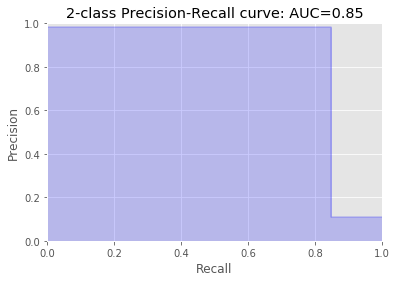

In [8]:
average_precision = average_precision_score(filtered_labels, label_predicted)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(filtered_labels, label_predicted)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))
plt.show()

In [9]:

print("Accuracy Score")
print (accuracy_score(filtered_labels, label_predicted))
print("\nConfusion Matrix")
print(confusion_matrix(filtered_labels, label_predicted))    # tn, fp, fn, tp 
print("\nClassification Report")
print(classification_report(filtered_labels, label_predicted)) 



Accuracy Score
0.9818746120422098

Confusion Matrix
[[43000    85]
 [  791  4454]]

Classification Report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     43085
          1       0.98      0.85      0.91      5245

avg / total       0.98      0.98      0.98     48330



In [ ]:
# need to pickle to model to a file
print("!!!! Add code to pickle model clf to file")    

In [ ]:
# works with PCA for 2 components
#plotDecisionBoundary(model, data_test, label_test)

In [ ]:
#df_competition.count()
#label_predicted_competition = model.predict(df_competition)



In [ ]:
do_merge = False
if do_merge :
    #df_competition_labels=pd.DataFrame(data=np.zeros(num), columns=['income'])
    df_label_predicted_competition = pd.DataFrame(data=label_predicted_competition, columns=['income'])
    #print df_label_predicted_competition.head(2)
    tmp_competition = pd.DataFrame(data=df_competition)

    print df_competition_labels.head()
    #tmp_indexes = df_competition.index.get_values()
    tmp_indexes = df_competition_labels.index.get_values()
    print tmp_indexes[0:5]
    #df_final = pd.merge(df_competition_labels, df_tmp, how='left',left_index=True, right_index=True) 
    #df_competition_labels 
    df_tmp = pd.DataFrame(data=label_predicted_competition,index=tmp_indexes, columns=['income'])

    df_final = pd.merge(df_competition_labels, df_tmp, how='left',left_index=True, right_index=True) 
            #on=None, left_on=None, right_on=None,
            # left_index=False, right_index=False, sort=True,
            # suffixes=('_x', '_y'), copy=True, indicator=False)
    df_final.head(45)

In [ ]:
#write out the CSV file with predicted labels
#output_file='C:/Users/smith/Documents/Becky/Capstone/predicted_labels.csv'

#df_label_predicted = pd.DataFrame(label_predicted)
#df_label_predicted = pd.DataFrame(
#              data=label_predicted_competition[1:],    # values
#              #index=['row_id'],    # 1st column as index
#              columns=['income']).copy() 
#df_final.to_csv(output_file, sep=',', columns=['row_id','income_y'],header=['row_id','income'], index=False)  #, index=True, index_label=['row_id'])
#df_final.head()
